In [33]:
import pandas as pd
import numpy as np

In [34]:
players = pd.read_csv("players_22.csv")

C:\Users\ekuru\AppData\Local\Temp\ipykernel_3172\2061566770.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [35]:
players.head

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [36]:
# for data cleaning process, we are chosing the desired features

In [37]:
features= ["overall","potential","wage_eur","value_eur","age"] #we are going to cluster those 5 features

In [68]:
players[features].describe().T

,count,mean,std,min,25%,50%,75%,max
overall,19239.0,6.577218e+01,6.880232e+00,47.0,61.0,66.0,70.0,93.0
potential,19239.0,7.107937e+01,6.086213e+00,49.0,67.0,71.0,75.0,95.0
wage_eur,19239.0,9.023667e+03,1.944983e+04,500.0,1000.0,3000.0,8000.0,350000.0
value_eur,19239.0,2.848490e+06,7.602509e+06,9000.0,475000.0,975000.0,2000000.0,194000000.0
age,19239.0,2.521082e+01,4.748235e+00,16.0,21.0,25.0,29.0,54.0


In [38]:
#FOR NULL VALUES WE USE KNN İMPUTER, It is a imputer that uses the k-Nearest Neighbors method to replace missing values in the dataset.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
players[features] = imputer.fit_transform(players[features])

 

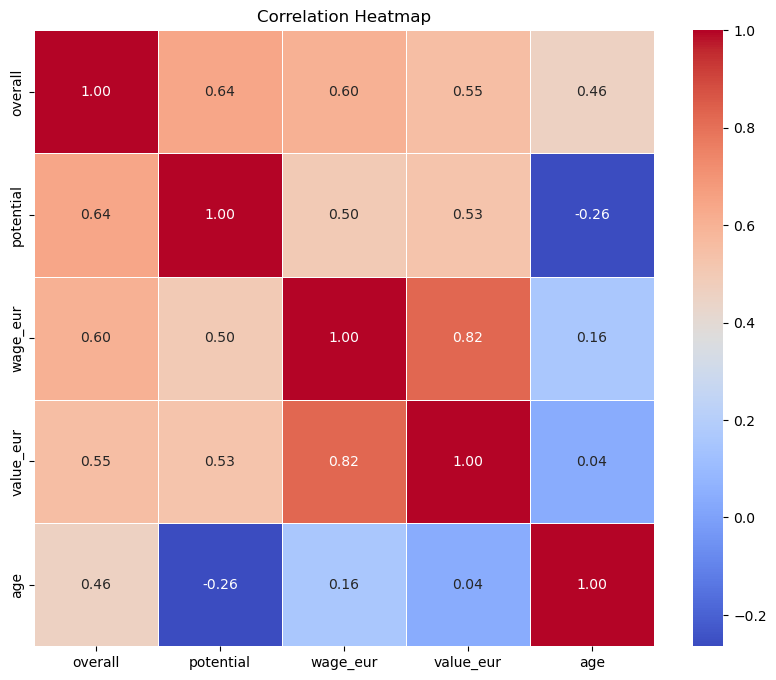

In [65]:
#Data visualization: 
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = players[features].corr() #We just use the features that we are going to cluster

# KKorelation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [40]:
players[features].isnull().sum()

overall      0
potential    0
wage_eur     0
value_eur    0
age          0
dtype: int64

In [41]:
data = players[features].copy()

In [42]:
data

,overall,potential,wage_eur,value_eur,age
0,93.0,93.0,320000.0,78000000.0,34.0
1,92.0,92.0,270000.0,119500000.0,32.0
2,91.0,91.0,270000.0,45000000.0,36.0
3,91.0,91.0,270000.0,129000000.0,29.0
4,91.0,91.0,350000.0,125500000.0,30.0
...,...,...,...,...,...
19234,47.0,52.0,1000.0,70000.0,22.0
19235,47.0,59.0,500.0,110000.0,19.0
19236,47.0,55.0,500.0,100000.0,21.0
19237,47.0,60.0,500.0,110000.0,19.0


1. scale the data in order to minimize 
2. rescale in order to balance in order to avoid dominating data importance
3. in order to apply kMeans algorithms random centroids will be initialized
4. label each data point in order to get clusters according to centroids
5. update centroids (find center point)
6. repeat label/update steps in order to finalize.




In [43]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0,10))
scaled_df = min_max_scaler.fit_transform(data)
data = pd.DataFrame(scaled_df)

In [66]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
0,19239.0,4.080909,1.495703,0.0,3.043478,4.130435,5.000000,10.0
1,19239.0,4.799863,1.323090,0.0,3.913043,4.782609,5.652174,10.0
2,19239.0,0.243882,0.556504,0.0,0.014306,0.071531,0.214592,10.0
3,19239.0,0.146372,0.391900,0.0,0.024022,0.049796,0.102634,10.0
4,19239.0,2.423900,1.249536,0.0,1.315789,2.368421,3.421053,10.0


1. min value set to 1 and max value is set to 10, and variance preserved from original data.

In [45]:
data.head()

,0,1,2,3,4
0,10.000000,9.565217,9.141631,4.020341,4.736842
1,9.782609,9.347826,7.711016,6.159616,4.210526
2,9.565217,9.130435,7.711016,2.319231,5.263158
3,9.565217,9.130435,7.711016,6.649329,3.421053
4,9.565217,9.130435,10.000000,6.468908,3.684211


In [46]:
#to create random centroids
def random_centroids(data,k):

    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float (x.sample())) 
        centroids.append(centroid)
    return pd.concat(centroids,axis=1)


In [47]:
centroids = random_centroids(data,5)

In [48]:
centroids

,0,1,2,3,4
0,4.782609,3.695652,4.130435,4.130435,4.130435
1,5.434783,4.782609,4.565217,5.652174,3.913043
2,0.243205,0.243205,0.815451,0.071531,0.042918
3,0.061395,0.087169,0.061395,0.051085,0.011908
4,1.842105,3.947368,2.105263,2.105263,0.789474


In [49]:
#finding cluster labels for each data point
def get_labels(data,centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)



In [50]:
labels =get_labels(data,centroids)

In [51]:
labels.value_counts()

0    4953
1    4937
4    3403
2    3164
3    2782
dtype: int64

In [52]:
#update centroids >> geometrics means of all of clusters

def new_centroids(data,labels,k):
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

#splitting data which contains players data up by clusters(labels) and to each group we are applying the function which
#gives geometric means of each feature which is cluster centroid


In [53]:
from sklearn.decomposition import PCA #turns 5 dimensional data into 2 dimensional data
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [54]:
def plot_clusters(data,labels,centroids,iteration):
        pca = PCA(n_components=2)
        data_2d= pca.fit_transform(data)
        centroids_2d= pca.transform(centroids.T)
        clear_output(wait=True)
        plt.title(f'Iteration {iteration}')
        plt.scatter(x=data_2d[:,0],y=data_2d[:,1], c =labels)
        plt.scatter(x=centroids_2d[:,0],y=centroids_2d[:,1])
        plt.show()

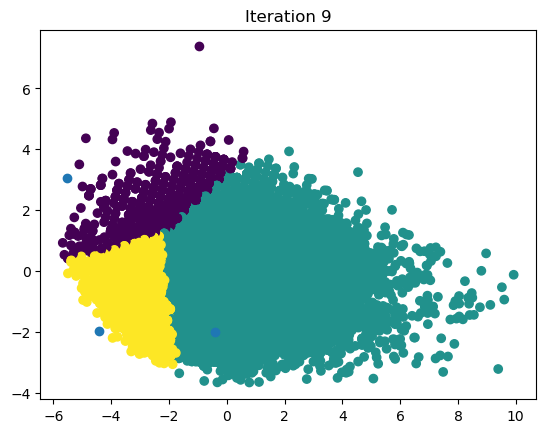

In [55]:
max_iterations = 100
k =3
centroids= random_centroids(data,k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels= get_labels(data,centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [56]:
centroids

,0,1,2
0,0.000000,4.258109,0.000000
1,0.000000,4.915946,3.581958
2,0.000000,0.000000,0.000000
3,0.000000,0.072278,0.010821
4,3.768109,0.000000,0.000000


In [57]:
players[labels == 0][["short_name"] + features].drop_duplicates()

,short_name,overall,potential,wage_eur,value_eur,age
7475,İ. Öztürk,67.0,67.0,3000.0,207000.0,40.0
7478,P. Da Silva,67.0,67.0,500.0,199000.0,41.0
7488,Zheng Zhi,67.0,67.0,5000.0,191000.0,40.0
8669,W. Hoolahan,66.0,66.0,2000.0,275000.0,39.0
8673,I. Vázquez,66.0,66.0,3000.0,90000.0,38.0
...,...,...,...,...,...,...
19208,Chen Zhengfeng,48.0,52.0,2000.0,70000.0,20.0
19209,K. Xamixidin,48.0,53.0,2000.0,70000.0,22.0
19217,J. Affonso,48.0,55.0,500.0,90000.0,23.0
19231,R. By,47.0,55.0,500.0,90000.0,22.0


In [58]:
from sklearn.cluster import KMeans

In [59]:
kmeans=KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [60]:
centroids = kmeans.cluster_centers_

In [61]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.085948,2.791982,5.760372
potential,3.815887,4.659708,6.180181
wage_eur,0.099735,0.041084,0.684447
value_eur,0.040422,0.037207,0.418025
age,3.502881,1.296769,2.585301


In [62]:
inertia_values = []
k_values = range(1, 11)  # Trying k from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)


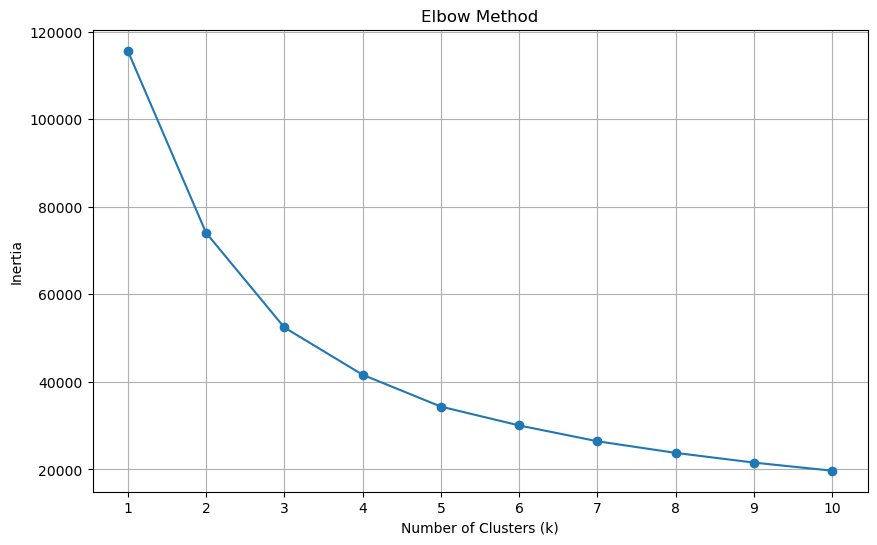

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [64]:
#according to the elbow method 3 is the number of k which is optimal number of clusters